In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline




In [2]:
# Loading the dataset
df=pd.read_csv('beer_nir_dataset.csv')

In [3]:
df.head()

,y,xtrain.1,xtrain.2,xtrain.3,xtrain.4,xtrain.5,xtrain.6,xtrain.7,xtrain.8,xtrain.9,...,xtrain.567,xtrain.568,xtrain.569,xtrain.570,xtrain.571,xtrain.572,xtrain.573,xtrain.574,xtrain.575,xtrain.576
0,4.230000,0.245288,0.251593,0.258437,0.265449,0.272342,0.280249,0.288323,0.297118,0.307861,...,3.679895,3.654557,3.653983,3.714209,3.669642,3.625521,3.647152,3.573585,3.623088,3.679775
1,6.020000,0.242613,0.248841,0.255609,0.262486,0.269311,0.277092,0.285063,0.293715,0.304371,...,3.632740,3.738945,3.601677,3.592955,3.606268,3.657218,3.632019,3.660901,3.635919,3.671539
2,6.490000,0.241651,0.247774,0.254431,0.261214,0.267891,0.275535,0.283370,0.291886,0.302335,...,3.563812,3.622122,3.617598,3.652315,3.590150,3.710362,3.630672,3.653063,3.566837,3.704355
3,8.920000,0.239650,0.245743,0.252350,0.259107,0.265761,0.273390,0.281214,0.289725,0.300164,...,3.583575,3.620621,3.682378,3.681044,3.650404,3.645983,3.633222,3.668727,3.650432,3.687260
4,8.979999,0.240787,0.246900,0.253521,0.260278,0.266935,0.274576,0.282420,0.290953,0.301394,...,3.650906,3.728940,3.614735,3.618842,3.656746,3.622961,3.560679,3.710902,3.653769,3.663029


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Columns: 577 entries, y to xtrain.576
dtypes: float64(577)
memory usage: 360.8 KB


In [5]:
df.describe()

,y,xtrain.1,xtrain.2,xtrain.3,xtrain.4,xtrain.5,xtrain.6,xtrain.7,xtrain.8,xtrain.9,...,xtrain.567,xtrain.568,xtrain.569,xtrain.570,xtrain.571,xtrain.572,xtrain.573,xtrain.574,xtrain.575,xtrain.576
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,11.098000,0.240688,0.246671,0.253154,0.259781,0.266300,0.273782,0.281456,0.289815,0.300070,...,3.604533,3.639836,3.605805,3.632483,3.612221,3.636000,3.625016,3.634084,3.623776,3.631408
std,2.439593,0.004523,0.004580,0.004643,0.004712,0.004783,0.004865,0.004950,0.005033,0.005146,...,0.038901,0.045959,0.037924,0.052041,0.030741,0.035653,0.037136,0.035504,0.044500,0.038456
min,4.230000,0.233627,0.239361,0.245561,0.251923,0.258175,0.265320,0.272693,0.280733,0.290599,...,3.509315,3.510193,3.509695,3.531929,3.552458,3.579498,3.551464,3.561743,3.525345,3.553380
25%,10.520001,0.237905,0.243890,0.250385,0.257020,0.263558,0.271032,0.278702,0.287062,0.297326,...,3.574558,3.608651,3.577371,3.600159,3.593994,3.607457,3.599428,3.605180,3.596664,3.605062
50%,10.770000,0.239295,0.245306,0.251816,0.258458,0.265003,0.272528,0.280216,0.288633,0.298835,...,3.602363,3.635608,3.602572,3.622819,3.608472,3.637175,3.613181,3.631862,3.625664,3.626278
75%,11.660000,0.242700,0.248875,0.255533,0.262263,0.268821,0.276345,0.284085,0.292496,0.302813,...,3.630012,3.674375,3.628935,3.655780,3.634007,3.656837,3.644560,3.661808,3.654148,3.662890
max,18.760000,0.254514,0.260426,0.266842,0.273389,0.279837,0.287227,0.294816,0.303077,0.313223,...,3.718258,3.738945,3.682378,3.779511,3.681713,3.722891,3.715324,3.710902,3.743476,3.704355


In [6]:
df.shape

(80, 577)

In [7]:
# Checking missing values
df.isnull().sum()

y             0
xtrain.1      0
xtrain.2      0
xtrain.3      0
xtrain.4      0
             ..
xtrain.572    0
xtrain.573    0
xtrain.574    0
xtrain.575    0
xtrain.576    0
Length: 577, dtype: int64

In [8]:
#checking duplicates
df.duplicated().sum()

20

In [9]:
y=df.iloc[:,0] 
X=df.iloc[:,1:]

In [10]:
y

0      4.230000
1      6.020000
2      6.490000
3      8.920000
4      8.979999
        ...    
75    12.080000
76    12.500000
77    13.010000
78    15.630000
79    16.170000
Name: y, Length: 80, dtype: float64

In [11]:
X

,xtrain.1,xtrain.2,xtrain.3,xtrain.4,xtrain.5,xtrain.6,xtrain.7,xtrain.8,xtrain.9,xtrain.10,...,xtrain.567,xtrain.568,xtrain.569,xtrain.570,xtrain.571,xtrain.572,xtrain.573,xtrain.574,xtrain.575,xtrain.576
0,0.245288,0.251593,0.258437,0.265449,0.272342,0.280249,0.288323,0.297118,0.307861,0.319456,...,3.679895,3.654557,3.653983,3.714209,3.669642,3.625521,3.647152,3.573585,3.623088,3.679775
1,0.242613,0.248841,0.255609,0.262486,0.269311,0.277092,0.285063,0.293715,0.304371,0.315839,...,3.632740,3.738945,3.601677,3.592955,3.606268,3.657218,3.632019,3.660901,3.635919,3.671539
2,0.241651,0.247774,0.254431,0.261214,0.267891,0.275535,0.283370,0.291886,0.302335,0.313625,...,3.563812,3.622122,3.617598,3.652315,3.590150,3.710362,3.630672,3.653063,3.566837,3.704355
3,0.239650,0.245743,0.252350,0.259107,0.265761,0.273390,0.281214,0.289725,0.300164,0.311455,...,3.583575,3.620621,3.682378,3.681044,3.650404,3.645983,3.633222,3.668727,3.650432,3.687260
4,0.240787,0.246900,0.253521,0.260278,0.266935,0.274576,0.282420,0.290953,0.301394,0.312720,...,3.650906,3.728940,3.614735,3.618842,3.656746,3.622961,3.560679,3.710902,3.653769,3.663029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.239102,0.245058,0.251507,0.258097,0.264591,0.272027,0.279661,0.287974,0.298163,0.309233,...,3.596695,3.559053,3.618219,3.707587,3.598587,3.677233,3.608634,3.603954,3.642673,3.625768
76,0.237254,0.243181,0.249565,0.256123,0.262555,0.269951,0.277526,0.285799,0.295911,0.306907,...,3.568768,3.642469,3.564409,3.608648,3.593994,3.688740,3.569870,3.592108,3.678230,3.640391
77,0.236802,0.242702,0.249102,0.255633,0.262058,0.269431,0.276988,0.285238,0.295372,0.306346,...,3.636069,3.608706,3.573321,3.636214,3.608515,3.640264,3.639226,3.642983,3.666952,3.625137
78,0.234624,0.240406,0.246638,0.253038,0.259332,0.266551,0.273964,0.282073,0.292029,0.302785,...,3.586622,3.646951,3.599025,3.531929,3.598209,3.587060,3.625044,3.631862,3.605816,3.687983


Text(0, 0.5, 'Spectral intensity')

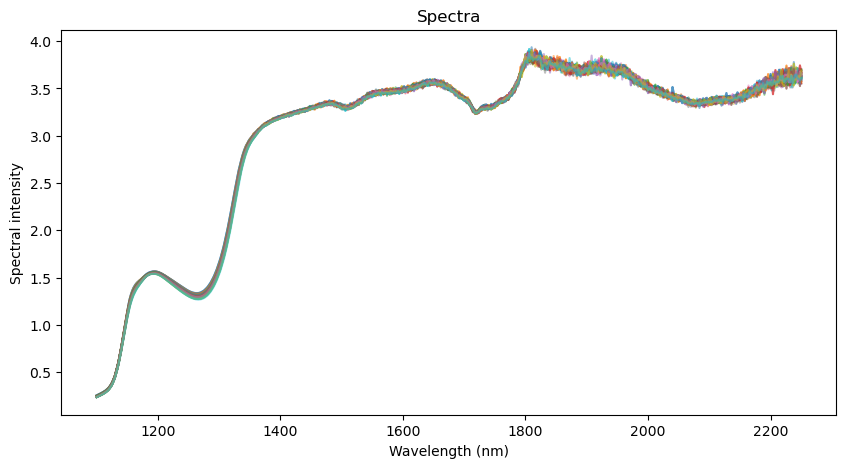

In [12]:
# Exploratory data analysis
wavelengths=np.arange(1100,2252,2)
plt.figure(figsize=(10,5))
for i in range(len(X)):
    plt.plot(wavelengths,X.iloc[i,:],alpha=0.5)
plt.title('Spectra')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Spectral intensity')



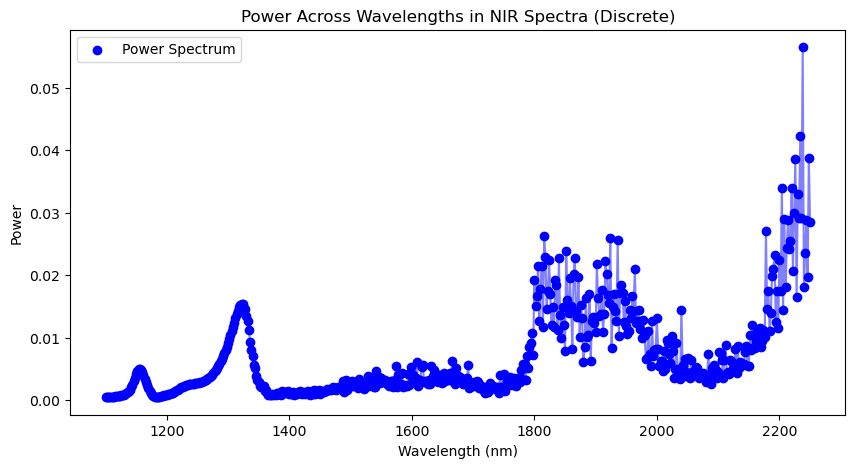

In [19]:
from scipy.signal import welch
# Compute PSD for each wavelength
powers = []
for i in range(X.shape[1]):  # Loop over each wavelength (column)
    frequencies, power = welch(X.iloc[:, i], fs=1.0, nperseg=20)  
    powers.append(np.sum(power))  # Sum power for each wavelength

# Convert to numpy array
powers = np.array(powers)

# Line plot instead of heatmap
plt.figure(figsize=(10, 5))
plt.scatter(wavelengths, powers, color="blue", label="Power Spectrum", marker="o")  # Scatter for discrete points
plt.plot(wavelengths, powers, color="blue", alpha=0.5)  # Optional: Line to connect points
plt.xlabel("Wavelength (nm)")
plt.ylabel("Power")
plt.title("Power Across Wavelengths in NIR Spectra (Discrete)")
plt.legend()
plt.show()


Fluctuations in intensity or power at higher wavelengths in NIR spectra can be due to various factors including water absorption, baseline shifts, 
and sample characteristics,requiring careful consideration and potentially preprocessing to ensure accurate analysis. The Savitzky-Golay filter is often
used as a preprocessing in spectroscopy and signal processing. The filter can be used to reduce high frequency noise in a signal
due to its smoothing properties and reduce low frequency signal (e.g., due to offsets and slopes) using differentiation. Here for reducing the fluctutation in higher wavelenth region, Savitzky-Golay filter is used.

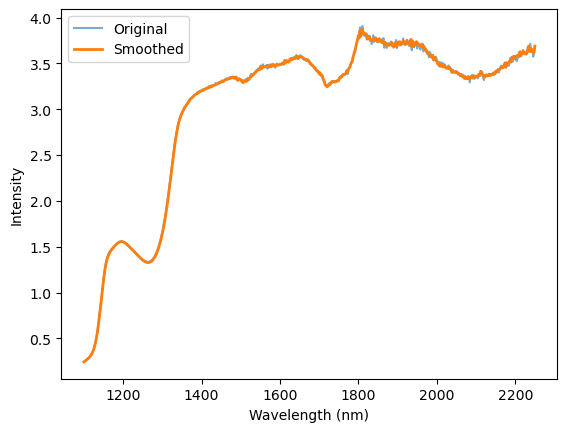

In [27]:
from scipy.signal import savgol_filter

# Apply Savitzky-Golay filter to smooth the spectral intensities
smoothed_data = savgol_filter(X, window_length=21, polyorder=2, axis=0)

# Plot the original and smoothed spectra for comparison
plt.plot(wavelengths, X.iloc[0, :], label="Original", alpha=0.6)  # First sample
plt.plot(wavelengths, smoothed_data[0, :], label="Smoothed", linewidth=2)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.legend()
plt.show()

Taking the first derivative of a spectral signal in spectral studies helps to enhance spectral resolution, reveal subtle features, and improve the accuracy of quantitative analysis by eliminating baseline shifts and improving the identification of overlapping peaks. 

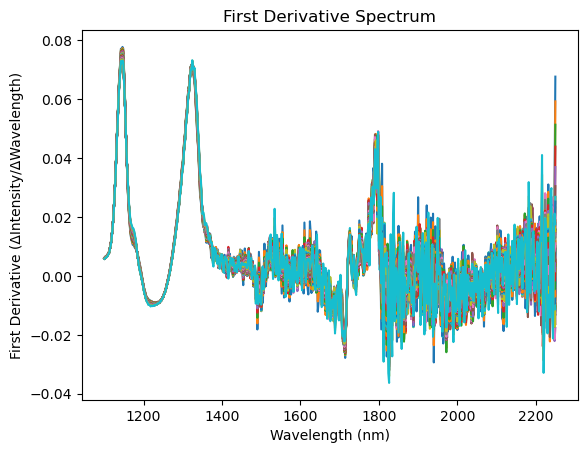

In [29]:
first_derivative = np.gradient(smoothed_data, axis=1)
for i in range(first_derivative.shape[0]):
    plt.plot(wavelengths, first_derivative[i])
plt.xlabel("Wavelength (nm)")
plt.ylabel("First Derivative (ΔIntensity/ΔWavelength)")
plt.title("First Derivative Spectrum")
plt.show()

In [31]:
#Standardization
scaler=StandardScaler()
X_scaled=scaler.fit_transform(first_derivative)

## Principle Component Analysis 
 PCA reduce the dimensionality of the NIR spectral data while preserving the most important variations in the data. Since THE  dataset contains 576 wavelengths (features) for each sample, PCA helps in extracting the most informative components and removing redundant information.
Principal component analysis, or PCA, reduces the number of dimensions in the datasets to principal components that retain most of the original information. It does this by transforming potentially correlated variables into a smaller set of variables, called principal components. 

Explained Variance Ratio of First 10 Components:
[0.31771303 0.13969522 0.107069   0.10521329 0.09894513 0.08180406
 0.04746675 0.02176109 0.01701816 0.01116846]


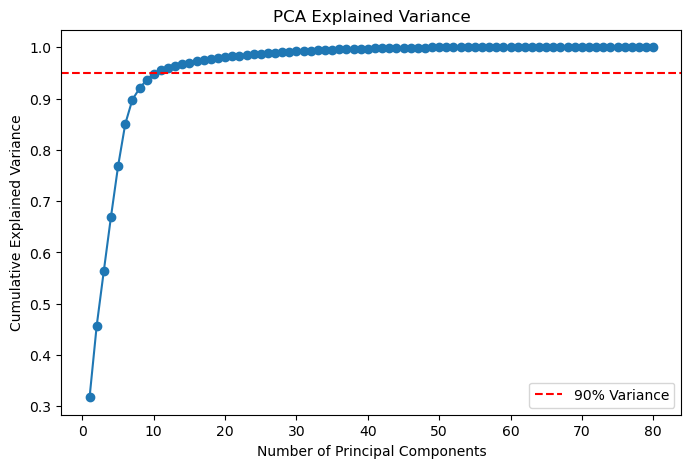

In [33]:
pca = PCA()  # Fit PCA without specifying components to get all
X_pca = pca.fit_transform(X_scaled)
# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print the first few explained variances
print("Explained Variance Ratio of First 10 Components:")
print(explained_variance[:10])  # 
# Compute cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')

# Mark the 90% threshold
plt.axhline(y=0.95, color='r', linestyle='--', label="90% Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.legend()
plt.show()

## Buildingand Evaluating the model
Partial Least Square regression technique is used to build the model. Spectroscopic data often involves numerous variables (wavelengths) that can be highly correlated (multicollinear). PLS regression is designed to effectively manage this, unlike traditional regression methods that struggle with such data. The model performance has been evaluated using mean squared erro and R2 score.


In [35]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

y_array=np.array(y).reshape(-1,1)
y_scaled = scaler.fit_transform(y_array)  # Scale y as well

# Step 2: Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Step 3: Apply PLS Regression
pls = PLSRegression(n_components=12)  # Use 11 components (based on PCA variance)
pls.fit(X_train, y_train)

# Step 4: Predict
y_pred = pls.predict(X_test)

# Step 5: Evaluate Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.0382
R² Score: 0.9387


The R² Score of 0.9387 indicates the model can predict 93% of test data effectively.

PLS regresion coefficient also known as regression weights, quantify the strength of the association between each predictor variable and the response variable, and can be used to select relevant predictors. The below figure shows the importance of particular wavelengths in predicting the original extract of Beer

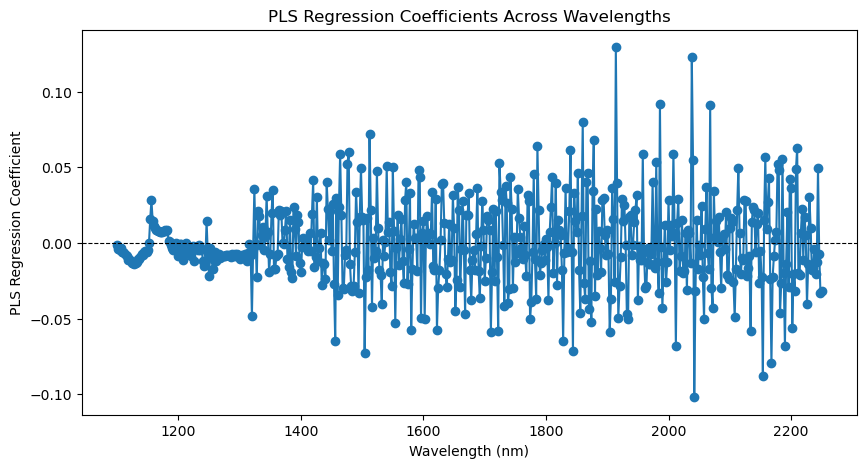

In [37]:
# Extract PLS regression coefficients
pls_coefficients = pls.coef_.flatten()  # Convert to 1D array if needed

# Get corresponding wavelength values (assuming column names represent wavelengths)
wavelengths = np.arange(1100, 2252, 2)  # Modify based on your dataset

# Plot the coefficients
plt.figure(figsize=(10, 5))
plt.plot(wavelengths, pls_coefficients, marker="o", linestyle="-")
plt.xlabel("Wavelength (nm)")
plt.ylabel("PLS Regression Coefficient")
plt.title("PLS Regression Coefficients Across Wavelengths")
plt.axhline(0, color='black', linewidth=0.8, linestyle="--")  # Reference line at 0
plt.show()

## Creating pipeline

In [39]:
import joblib

# Custom Transformer for Savitzky-Golay Filtering
class SavGolFilter:
    def __init__(self, window_length=21, polyorder=2):
        self.window_length = window_length
        self.polyorder = polyorder

    def transform(self, X):
        return savgol_filter(X, window_length=self.window_length, polyorder=self.polyorder, axis=1)

    def fit(self, X, y=None):
        return self

# Custom Transformer for First Derivative Calculation
class FirstDerivative:
    def transform(self, X):
        return np.gradient(X, axis=1)

    def fit(self, X, y=None):
        return self

# Define the pipeline
pipeline = Pipeline([
    ("savgol_filter", SavGolFilter(window_length=21, polyorder=2)),  # Step 1: Filtering
    ("derivative", FirstDerivative()),  # Step 2: Derivative Calculation
    ("scaler", StandardScaler()),  # Step 3: Scaling
    ("pca", PCA(n_components=11)),  # Step 4: PCA (Retaining 95% Variance)
    ("pls", PLSRegression(n_components=11))  # Step 5: PLS Regression
])

# Load dataset

# Train the pipeline
pipeline.fit(X, y)

# Save the trained pipeline
joblib.dump(pipeline, "NIR_model.pkl")
print("Pipeline model saved successfully!")

Pipeline model saved successfully!


In [41]:
loaded_model=joblib.load('NIR_model.pkl')

In [ ]:
# Testing the model with unseen data
new_data = pd.read_excel('unseen_NIR.xlsx')  # Replace with your actual file
X_new = new_data.iloc[:, 0:].values  # Extract spectral data (ignore first column if not needed)

# Predict concentrations for new data
predictions = loaded_model.predict(X_new)

# Save predictions
new_data["Predicted_Concentration"] = predictions
new_data.to_csv("predicted_results.csv", index=False)

print("Predictions saved successfully!")